In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
athletes = pd.read_csv(r"X:\Data Science\Projects\Olympics Data Analysis 2021\athlete_events.csv")
region = pd.read_csv(r"X:\Data Science\Projects\Olympics Data Analysis 2021\noc_regions.csv")

In [115]:
athletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [116]:
region.head(2)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles


In [117]:
athletes_df = pd.merge(athletes, region)
#athlets_df = athletes.merge(region,how = 'left', on = 'NOC')

In [118]:
athletes_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


#### Make the column names consistent

In [119]:
athletes_df.rename(columns = {'region':'Region', 'notes':'Notes'}, inplace = True)

In [120]:
athletes_df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN


In [121]:
athletes_df.shape

(270767, 17)

In [122]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270767 entries, 0 to 270766
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     261305 non-null  float64
 4   Height  210684 non-null  float64
 5   Weight  207982 non-null  float64
 6   Team    270767 non-null  object 
 7   NOC     270767 non-null  object 
 8   Games   270767 non-null  object 
 9   Year    270767 non-null  int64  
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Event   270767 non-null  object 
 14  Medal   39774 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [123]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,270767.000000,261305.000000,210684.000000,207982.000000,270767.000000
mean,68229.276832,25.559783,175.344250,70.709523,1978.362297
std,39017.998824,6.392501,10.519556,14.350094,29.884637
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34630.500000,21.000000,168.000000,60.000000,1960.000000
50%,68187.000000,24.000000,175.000000,70.000000,1988.000000
75%,102065.500000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


#### Check the null values 

In [124]:
nan_columns = athletes_df.isnull().any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [125]:
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
Region        21
Notes     265728
dtype: int64

#### Q) Print the column names contaning null values or missing values in the form of a list

In [126]:
# India details

athletes_df[athletes_df['Team'] == 'India'].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
159083,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
159084,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
159085,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
159086,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
159087,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [127]:
athletes_df[athletes_df['Team'] == 'Japan'].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
164221,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
164225,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
164226,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
164227,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
164228,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


#### top 10 contries participating scince olympics starts

In [128]:
top_10_countries =  athletes_df['Team'].value_counts().sort_values(ascending = False).head(10)
top_10_countries


United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

####  Plot for the top 10 participating countries

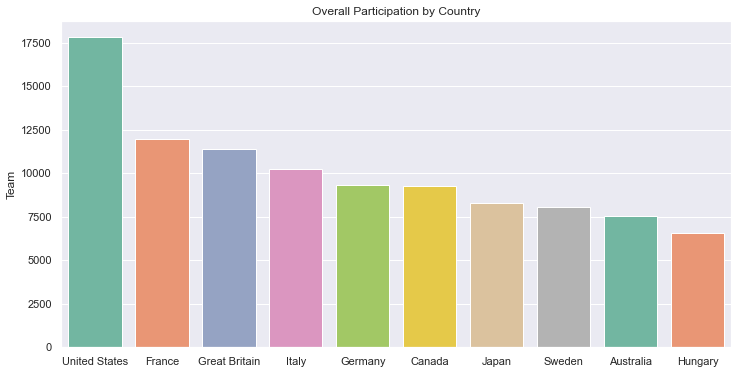

In [129]:
plt.figure(figsize = (12,6))
plt.title("Overall Participation by Country")
sns.barplot(x = top_10_countries.index, y =top_10_countries, palette = 'Set2')
plt.show()

#### Age Distribution of the participants

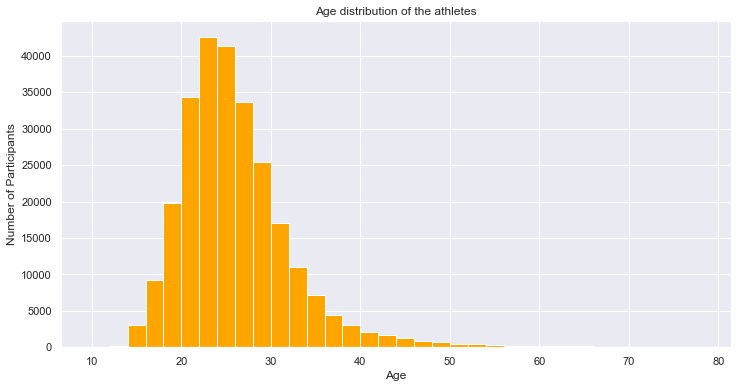

In [130]:
plt.figure(figsize = (12,6))
plt.title("Age distribution of the athletes")
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.hist(athletes_df.Age, bins = np.arange(10,80,2) , color = 'orange' , edgecolor = 'white');

#### Find out  different types of Winter Olympics Sports

In [131]:
athletes_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [132]:
winter_sports = athletes_df[athletes_df['Season'] == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Short Track Speed Skating', 'Curling',
       'Figure Skating', 'Snowboarding', 'Cross Country Skiing',
       'Ice Hockey', 'Freestyle Skiing', 'Alpine Skiing', 'Biathlon',
       'Ski Jumping', 'Bobsleigh', 'Nordic Combined', 'Skeleton', 'Luge',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

#### Find out the Summer Olympics Sport

In [133]:
summer_sports = athletes_df[athletes_df['Season'] == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Boxing', 'Wrestling', 'Swimming',
       'Softball', 'Hockey', 'Archery', 'Triathlon', 'Football',
       'Rhythmic Gymnastics', 'Athletics', 'Badminton', 'Fencing',
       'Gymnastics', 'Volleyball', 'Baseball', 'Water Polo', 'Shooting',
       'Weightlifting', 'Cycling', 'Rowing', 'Sailing', 'Diving',
       'Modern Pentathlon', 'Art Competitions', 'Synchronized Swimming',
       'Handball', 'Canoeing', 'Table Tennis', 'Tennis', 'Taekwondo',
       'Beach Volleyball', 'Trampolining', 'Golf', 'Equestrianism',
       'Tug-Of-War', 'Polo', 'Rugby Sevens', 'Ice Hockey',
       'Figure Skating', 'Roque', 'Rugby', 'Lacrosse', 'Jeu De Paume',
       'Cricket', 'Croquet', 'Motorboating', 'Basque Pelota', 'Alpinism',
       'Aeronautics', 'Racquets'], dtype=object)

#### Analysis male and female participants science 1896

In [134]:
athletes_df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN


In [135]:
gender_counts = athletes_df['Sex'].value_counts()
gender_counts

M    196374
F     74393
Name: Sex, dtype: int64

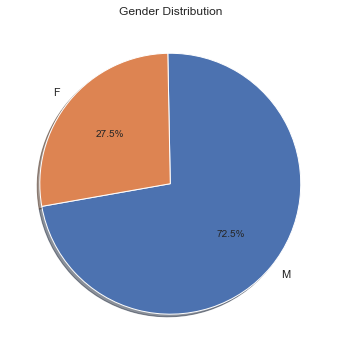

In [136]:
plt.figure(figsize=(12,6))
plt.title("Gender Distribution")
plt.pie(gender_counts, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 190, shadow = True);

#### Total number of medals that the athletes are won since 1896

In [137]:
medals = athletes_df.Medal.value_counts()

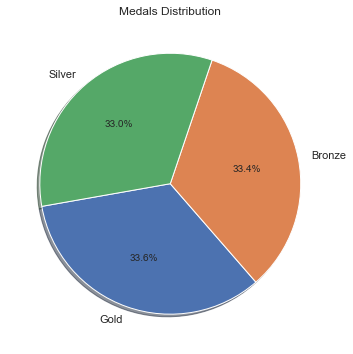

In [138]:
plt.figure(figsize=(12,6))
plt.title("Medals Distribution")
plt.pie(medals, labels = medals.index, autopct = '%1.1f%%', startangle = 190, shadow = True);

#### Find out total number of female athlets in each Olympics

In [139]:
female_athletes = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')]
female_athletes.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
270760,119487,Likeleli Alinah Thamae,F,22.0,170.0,49.0,Lesotho,LES,2000 Summer,2000,Summer,Sydney,Taekwondo,Taekwondo Women's Flyweight,NaN,Lesotho,NaN
270761,119563,Masempe Theko,F,25.0,NaN,NaN,Lesotho,LES,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 50 metres Freestyle,NaN,Lesotho,NaN
270762,120575,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
270763,120575,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
270764,122166,M'apotlaki Ts'elho,F,15.0,NaN,NaN,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN


Text(0.5, 1.0, 'Women Participation')

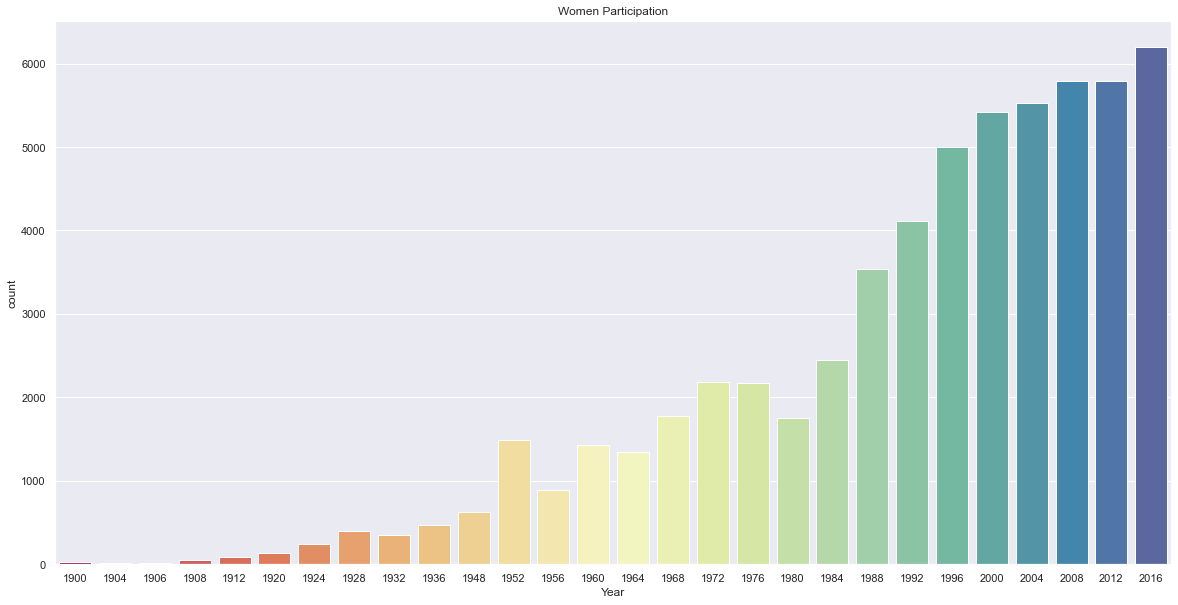

In [140]:
sns.set(style ="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Year', data = female_athletes,palette = "Spectral")
plt.title("Women Participation")

Text(0.5, 1.0, 'Plot of Female Athletes over time')

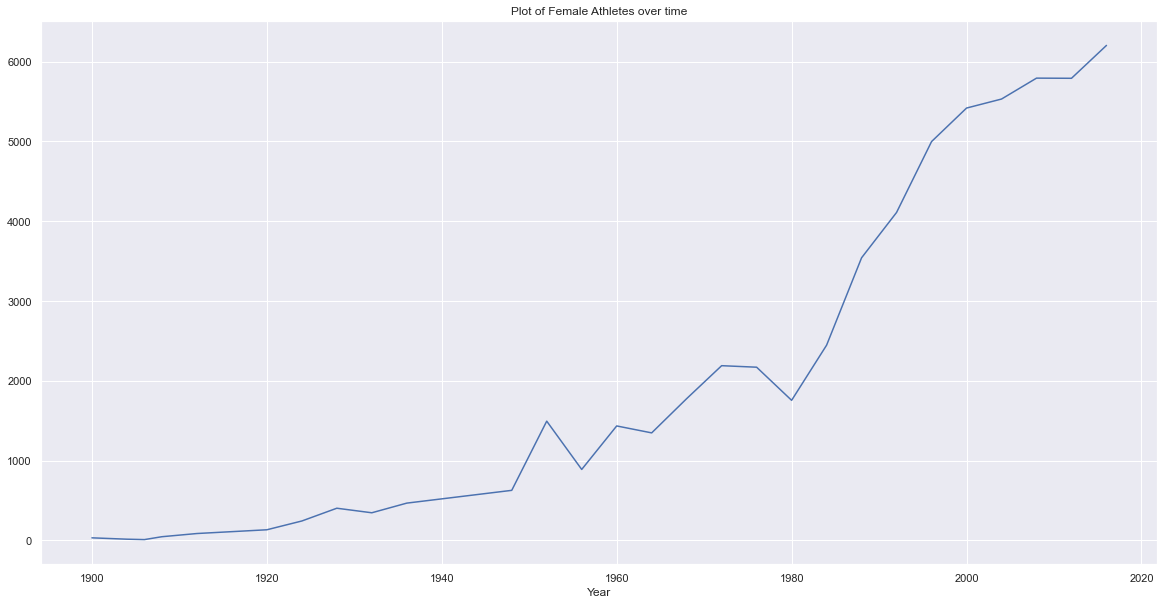

In [141]:
part = female_athletes.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of Female Athletes over time')

### Filter the data to see the athletes who won gold medal

In [142]:
goldmedals = athletes_df[(athletes_df.Medal == 'Gold')]
goldmedals.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
68,17294,Cai Yalin,M,23.0,174.0,60.0,China,CHN,2000 Summer,2000,Summer,Sydney,Shooting,"Shooting Men's Air Rifle, 10 metres",Gold,China,NaN
77,17299,Cai Yun,M,32.0,181.0,68.0,China-1,CHN,2012 Summer,2012,Summer,London,Badminton,Badminton Men's Doubles,Gold,China,NaN


In [149]:
# take only the values that are different from NaN.
goldmedals = goldmedals[np.isfinite(goldmedals['Age'])]

In [150]:
# Gold beyond 60 
goldmedals['ID'][goldmedals['Age'] > 60].count()


6

In [151]:
sporting_events = goldmedals[['Sport']][goldmedals['Age'] > 60]
sporting_events

,Sport
10718,Art Competitions
22547,Roque
27945,Archery
30405,Archery
32775,Archery
197667,Shooting


### Glod medals for each country

In [155]:
goldmedals.Region.value_counts().reset_index(name = 'Medal').head()

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Text(0.5, 1.0, 'Gold Medals per Country')

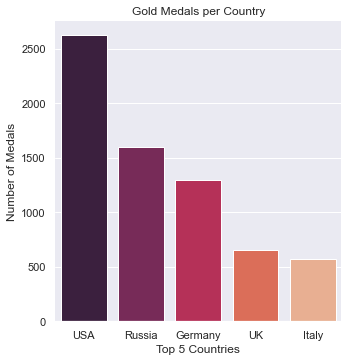

In [163]:
totalGoldMedals = goldmedals.Region.value_counts().reset_index(name= 'Medal').head()
g = sns.catplot(x='index', y =  'Medal', data = totalGoldMedals, height = 5, kind='bar', palette = 'rocket')
g.despine(left = True)
g.set_xlabels('Top 5 Countries')
g.set_ylabels('Number of Medals')
plt.title('Gold Medals per Country')

### Rio Olympics

In [167]:
max_year = athletes_df.Year.max()
print(max_year)

team_names = athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal == 'Gold')].Team
team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

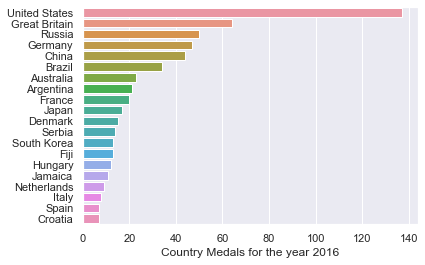

In [171]:
sns.barplot(x = team_names.value_counts().head(20), y = team_names.value_counts().head(20).index)
plt.ylabel(None);
plt.xlabel('Country Medals for the year 2016');

In [174]:
not_null_medals = athletes_df[(athletes_df['Height'].notnull()) & (athletes_df['Weight'].notnull())]
not_null_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


Text(0.5, 1.0, 'Height vs Weight of Olympics Medalists')

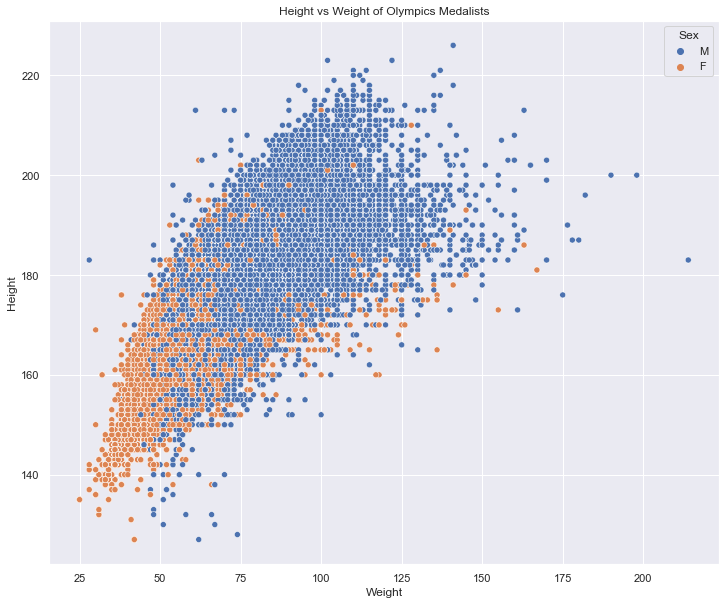

In [175]:
plt.figure(figsize =(12,10))
axis = sns.scatterplot(x="Weight", y ='Height', data = not_null_medals, hue = 'Sex')
plt.title('Height vs Weight of Olympics Medalists')